<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/Day1_Introduction_to_DL_framework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load data & pre-process**

In [10]:
from keras.datasets import mnist
from keras.utils import np_utils

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Original dimension: ", X_train.shape)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("After reshape: ", X_train.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Original dimension:  (60000, 28, 28)
After reshape:  (60000, 28, 28, 1)


**Show some random sample**

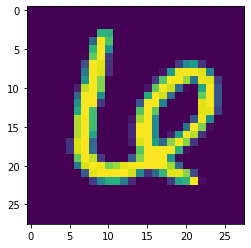

In [11]:
from matplotlib import pyplot as plt
import numpy as np

rnd_int = np.random.randint(X_train.shape[0], size=1)[0]
# plt.imshow(X_train[rnd_int])
plt.imshow(X_train.reshape(X_train.shape[0], 28, 28)[rnd_int])

**Define CNN model**

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
None


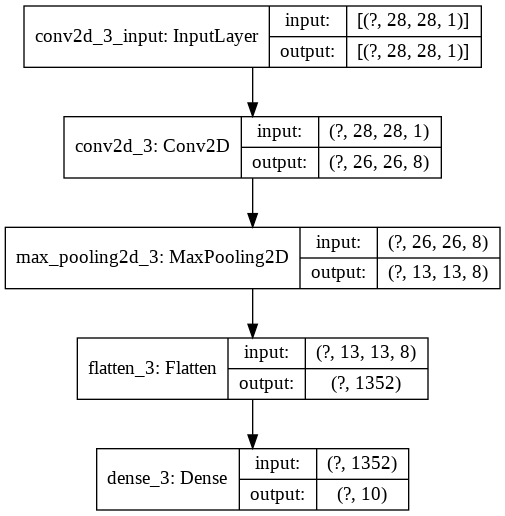

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils.vis_utils import plot_model

num_filters = 8
filter_size = 3
pool_size = 2

def build_model():
  model = Sequential([
  Convolution2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
  ])
  return model
  
model = build_model()
print(model.summary())

plot_model(model, to_file='my_model_plot.png', show_shapes=True, show_layer_names=True)

**Compile model**

In [13]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

**Fit model**

In [14]:
history = model.fit(
    X_train,
    Y_train,
    epochs=3,
    validation_data=(X_test, Y_test),
    batch_size=10, verbose=2
    )

# Saving model weight
model.save_weights('my_mnist_cnn.h5')
print("Model weight is saved.")

Epoch 1/3
6000/6000 - 13s - loss: 0.2874 - accuracy: 0.9181 - val_loss: 0.1876 - val_accuracy: 0.9462
Epoch 2/3
6000/6000 - 13s - loss: 0.1504 - accuracy: 0.9571 - val_loss: 0.1157 - val_accuracy: 0.9650
Epoch 3/3
6000/6000 - 13s - loss: 0.1088 - accuracy: 0.9688 - val_loss: 0.0970 - val_accuracy: 0.9694


**Prediction with trained model**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = build_model()

# Load the model's saved weights.
model.load_weights('my_mnist_cnn.h5')

Build model.
Load the model's saved weights.


array([42329, 28637, 39822, 46176])

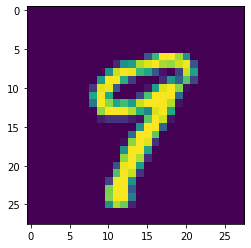

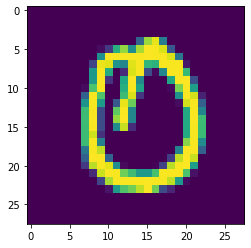

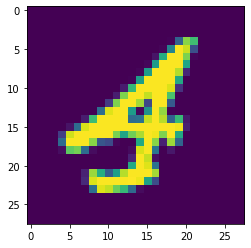

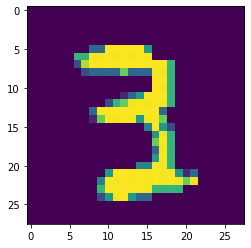

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# A few random samples
use_samples = np.random.randint(X_train.shape[0], size=4) # [5, 38, 3939, 27389]
samples_to_predict = []
img_width, img_height = 28, 28

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = X_train[sample].reshape((img_width, img_height))
  plt.imshow(reshaped_image)
  plt.show()
  # Add sample to array for prediction
  samples_to_predict.append(X_train[sample])

In [27]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
# print(samples_to_predict.shape)

# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print("predictions: ", predictions)

# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print("classes: ", classes)

predictions:  [[1.2334020e-07 1.0378815e-06 4.3359332e-06 9.1752983e-05 1.0309937e-04
  1.3260783e-05 2.3317973e-08 2.8180078e-02 7.8718830e-03 9.6373439e-01]
 [9.9810576e-01 4.7838160e-08 3.3045799e-06 3.0420404e-06 8.0873148e-09
  6.2489824e-05 6.1026361e-04 1.9073463e-09 4.6318368e-04 7.5195683e-04]
 [9.2600640e-05 9.4165691e-05 3.2158702e-04 3.0292770e-02 9.3788922e-01
  4.4500539e-03 4.3443330e-03 4.0575910e-06 2.1812381e-02 6.9882534e-04]
 [2.4184533e-08 5.2599873e-08 3.7414097e-04 9.9749810e-01 3.0181205e-08
  1.5506271e-03 1.5056970e-10 1.1248312e-06 2.9411801e-04 2.8175637e-04]]
classes:  [9 0 4 3]
